# Video Games Sales Prediction

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot

## Get the data

We will start by importing the data: 

In [2]:
data = pd.read_csv('./Video-Game-Sales.csv',index_col='Rank')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


We have 16598 rows and 10 columns

In [4]:
data.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


The 10 columns are: Name, Platform, Year, Genre, Publisher, NA_Sales, JP_Sales, Other_Sales, Global_Sales

## Data cleaning:

We will start be removing the Name as it does not provide any meaningful data, We will also remove regional sales as we can see the global sales is the sum of the regional sales

In [5]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

data.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
data.head(10)

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
6,GB,1989.0,Puzzle,Nintendo,30.26
7,DS,2006.0,Platform,Nintendo,30.01
8,Wii,2006.0,Misc,Nintendo,29.02
9,Wii,2009.0,Platform,Nintendo,28.62


We will then check for null values

In [7]:
data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

We have null values for the Year and the Publisher

We will fill the missing Year values with the most common year from the Year column

In [8]:
data['Year']=data['Year'].fillna(data['Year'].mode()[0])

We will convert the Year from Float to Integer value

In [9]:
data['Year'] = data['Year'].astype('int64')

In [10]:
print(data.isnull().sum())

Platform         0
Year             0
Genre            0
Publisher       58
Global_Sales     0
dtype: int64


We will drop the rows that contains null values for the Publisher

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

## Data analysis and visualization

In [13]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006,Sports,Nintendo,82.74
2,NES,1985,Platform,Nintendo,40.24
3,Wii,2008,Racing,Nintendo,35.82
4,Wii,2009,Sports,Nintendo,33.00
5,GB,1996,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002,Platform,Kemco,0.01
16597,GC,2003,Shooter,Infogrames,0.01
16598,PS2,2008,Racing,Activision,0.01


Lets explore the Platform data

In [14]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
data['Platform'].unique().size

31

We have 31 unique values for the Platform

In [16]:
print(pd.value_counts(data["Platform"]))


PS2     2159
DS      2156
PS3     1326
Wii     1324
X360    1261
PSP     1211
PS      1193
PC       954
XB       824
GBA      796
GC       556
3DS      507
PSV      411
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


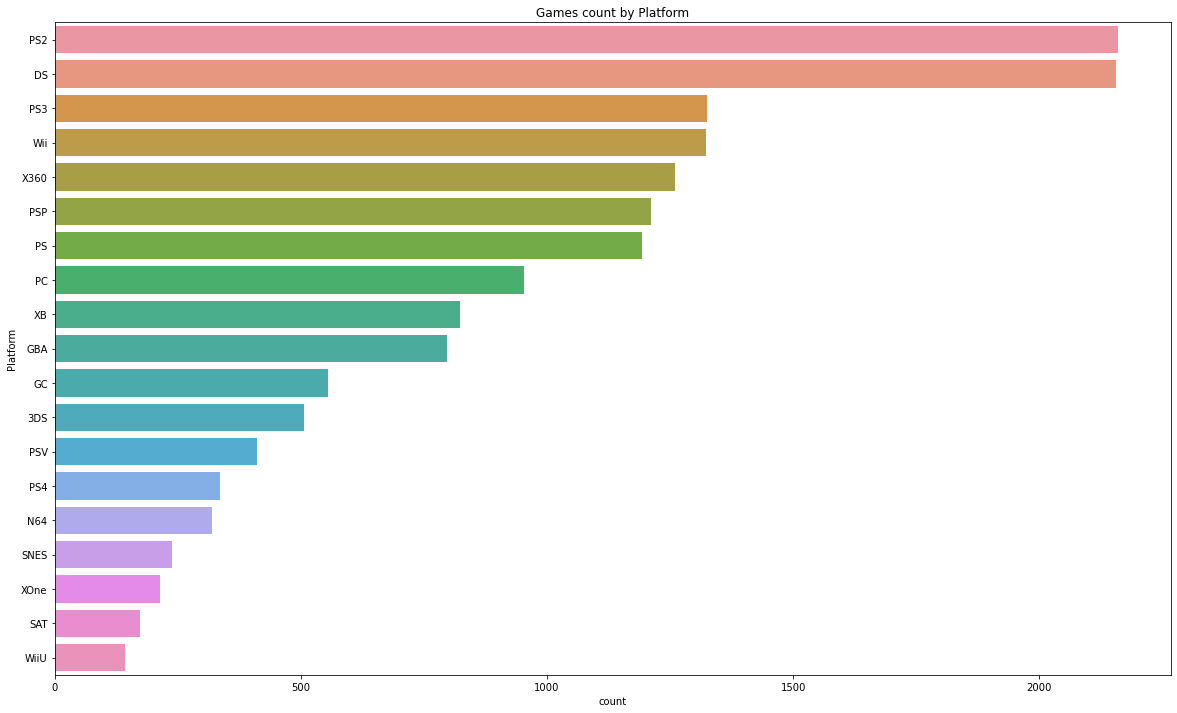

In [17]:
import seaborn as sns
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Platform')
sns.countplot(y='Platform', data=data, order=data.Platform.value_counts().iloc[:19].index)
pyplot.show()

We can see that PS2 and DS are the most common platforms in the dataset 

Lets explore the Genre data

In [18]:
data['Genre'].describe()

count      16540
unique        12
top       Action
freq        3309
Name: Genre, dtype: object

We have 12 unique Genre in the dataset

In [19]:
data.Genre.value_counts()

Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: Genre, dtype: int64

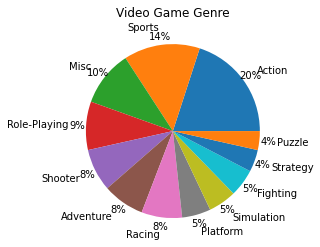

In [20]:
pyplot.pie(data.Genre.value_counts(), labels=data.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
pyplot.title('Video Game Genre')
pyplot.ylabel(' ')
pyplot.show()

We can see that Action and Sport are the most common Genre in the dataset

Lets explore the Publisher data

In [21]:
counts = data['Publisher'].value_counts()
counts

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [22]:
data['Publisher'].describe()


count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

We have 578 unique Publisher categories in the dataset, and Electronic Arts is the most common publisher, The figure below shows the top 20 publishers in the dataset

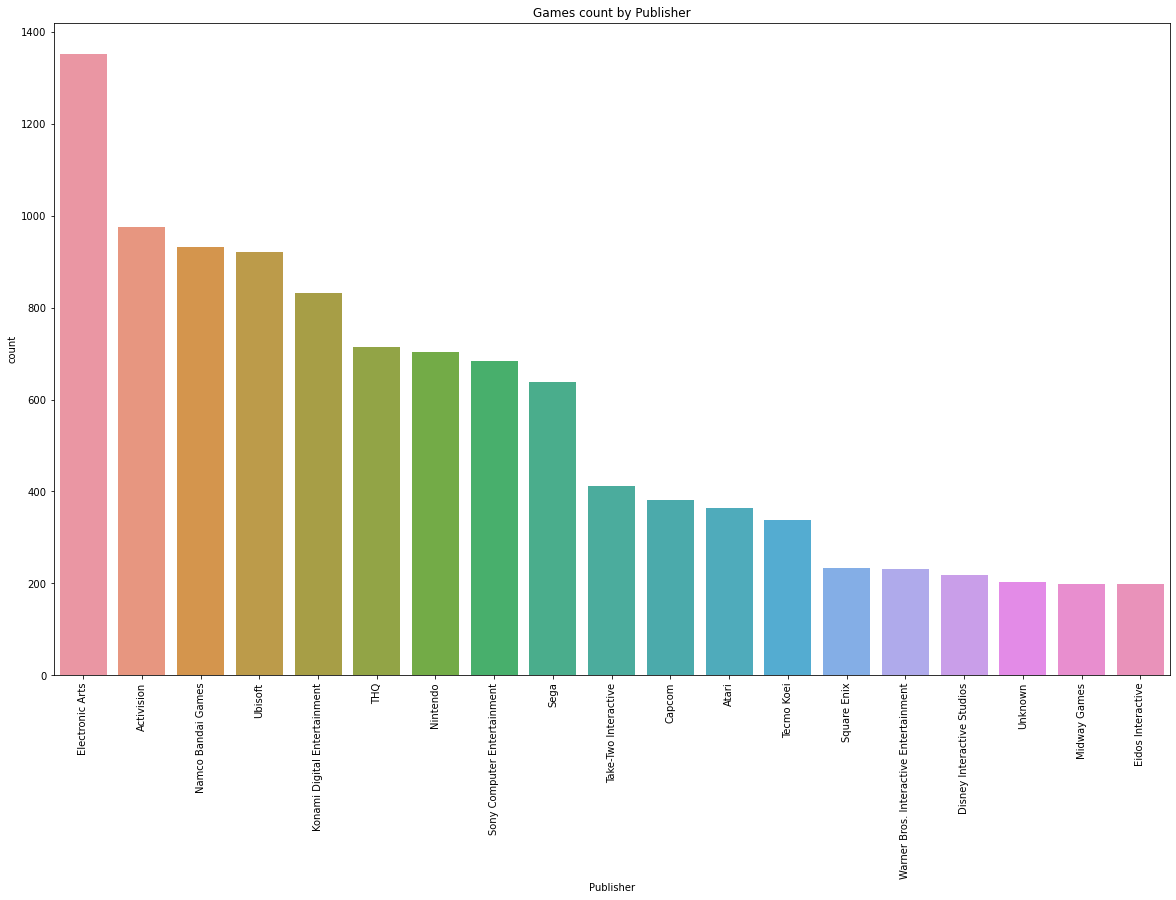

In [23]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Publisher')
sns.countplot(x='Publisher', data=data, order=data.Publisher.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

Lets explore the Year data

In [24]:
data['Year'].value_counts()

2009    1680
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [25]:
years = data.Year.unique()
start_year = years.min()
end_year = years.max()
print(start_year)
print(end_year)

1980
2020


We can see that we have data from 1980 to 2020. figure below shows the top common 15 years in the dataset, we can see that 2009 and 2008 are the most common years. 

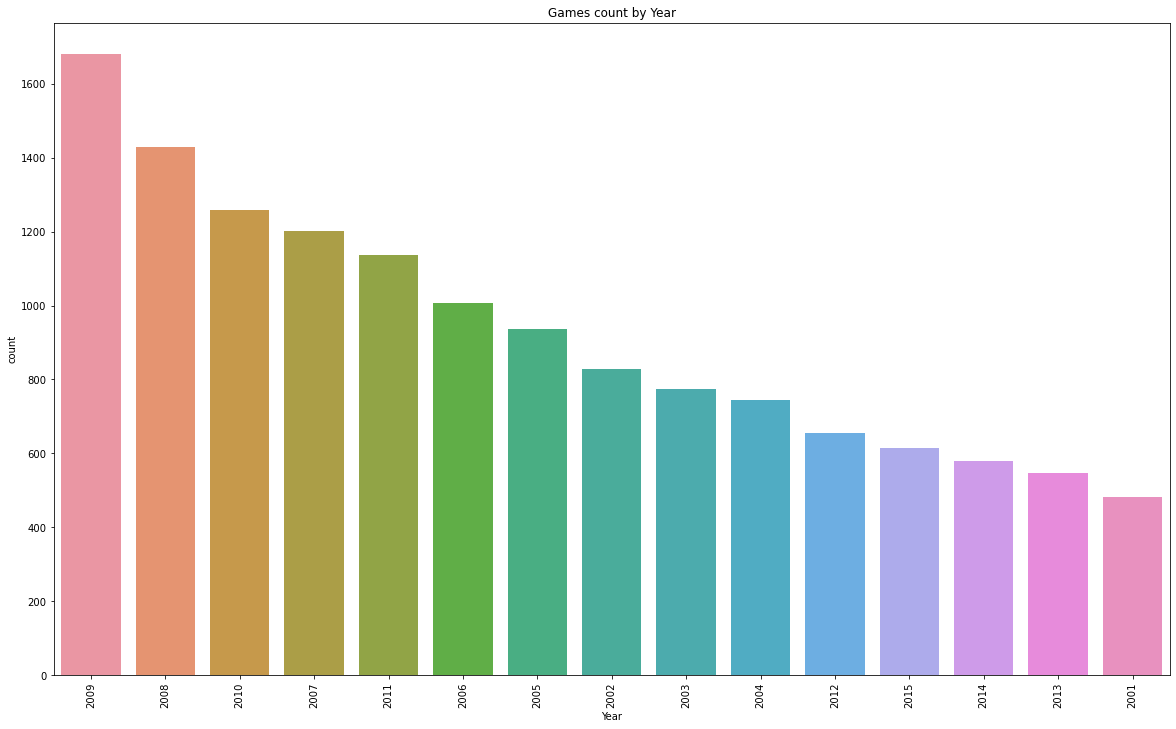

In [26]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Year')
sns.countplot(x='Year', data=data, order=data.Year.value_counts().iloc[:15].index)
pyplot.xticks(rotation= 90)
pyplot.show()

## Data Preparation

We will first clean the Publisher data

In [27]:
counts = data['Publisher'].value_counts()
counts

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [28]:
data['Publisher'].describe()

count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

We have 578 different publishers, we can see many of these publishers have rare occurrences and are not repeated enough. 578 categories will be very large and we will need to handle rare values

In [29]:
(data['Publisher'].value_counts() == 1).value_counts()

False    384
True     194
Name: Publisher, dtype: int64

In [30]:
(data['Publisher'].value_counts() < 50).value_counts()

True     532
False     46
Name: Publisher, dtype: int64

We can see that 194 publishers are repeated only once. and 532 publishers are repeated less than 50 times. We will mark these small and rare publishers as Other

In [31]:
clean_publishers = data['Publisher'].apply(lambda x: 'Other' if counts[x] < 50 else x)

In [32]:
clean_publishers.value_counts()['Other']

3342

3342 rows in the data contains 532 rare publishers, each with less than 50 occurrence. We will use the new clean list of publishers instead that replaced the rare publishers with 'Other'

In [33]:
data['Publisher'] = clean_publishers

In [34]:
data['Publisher'].describe()


count     16540
unique       47
top       Other
freq       3342
Name: Publisher, dtype: object

Now we have 47 publishers values

We will now remove the outliers data from the Global Sales column

In [35]:
max_threshold = data['Global_Sales'].quantile(0.98)
max_threshold


3.73

In [36]:
(data['Global_Sales']>max_threshold).value_counts()

False    16210
True       330
Name: Global_Sales, dtype: int64

We will remove the 330 entries as they will affect the model accuracy

In [37]:
cleaned_data = data[(data.Global_Sales < max_threshold)]


We will now transform the Year values into more meaningful represenation. The year data represents the relation of years passing and the sales, so we will represent the start year as 0 and the Year data will represent how many years passed from the start year 

In [38]:
years = cleaned_data.Year.unique()
start_year = years.min()

cleaned_data['Year'] = cleaned_data['Year'] - start_year

/tmp/ipykernel_3773697/3710542748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['Year'] - start_year


In [39]:
cleaned_data.head()

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
333,PS,19,Action,Eidos Interactive,3.72
334,PS,20,Platform,Sony Computer Entertainment,3.71
335,PS2,24,Sports,Electronic Arts,3.70
336,GB,18,Strategy,Nintendo,3.70
337,PS3,33,Shooter,Electronic Arts,3.69


### Encoding

We will now encode the categorical data: Platform, Genre, Publisher

- One Hot Encoding

We will use one hot encoding to encode these categorical values 

In [40]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [41]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [42]:
onehot_encoded_data = onehot_encode(cleaned_data, onehot_columns)

In [43]:
onehot_encoded_data.head()

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
333,19,3.72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
334,20,3.71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,24,3.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,18,3.70,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
337,33,3.69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the categorical values have been transformed into features, and now we have 92 features

In [44]:
onehot_encoded_data.head()

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
333,19,3.72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
334,20,3.71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,24,3.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,18,3.70,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
337,33,3.69,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Ordinal Encoding

We will also do some experiements with Ordinal Encoding

In [45]:
def ordinal_encoder(data,feature,feature_rank):
    
    ordinal_dict = {}
    
    for i, feature_value in enumerate(feature_rank):
        ordinal_dict[feature_value]=i+1
    
    data[feature] = data[feature].map(lambda x: ordinal_dict[x])
    
    return data

In [46]:
ordinal_encoded_data = cleaned_data


ordinal_encoder(ordinal_encoded_data, 'Platform', ordinal_encoded_data.Platform.unique())

ordinal_encoder(ordinal_encoded_data, 'Publisher', ordinal_encoded_data.Publisher.unique())

ordinal_encoder(ordinal_encoded_data, 'Genre', ordinal_encoded_data.Genre.unique())

ordinal_encoded_data.head()

/tmp/ipykernel_3773697/3071495435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].map(lambda x: ordinal_dict[x])


,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
333,1,19,1,1,3.72
334,1,20,2,2,3.71
335,2,24,3,3,3.70
336,3,18,4,4,3.70
337,4,33,5,3,3.69


## Machine Learning models

### We will start with experiments with the One Hot Encoded Data

In [84]:
y = onehot_encoded_data['Global_Sales']
X = onehot_encoded_data.drop(['Global_Sales'], axis=1)

We will split the dataset as 80% training and 20% testing 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Multi Linear Regression 

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import math
from sklearn.metrics import mean_squared_error

In [87]:
def plot_learning_curves(model, X_data, y_data):
    X_tr, X_val, y_tr, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_tr) + 1, 100):
        model.fit(X_tr[:m], y_tr[:m])
        y_train_predict = model.predict(X_tr[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_tr[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))


    x_ax = range(1, len(X_tr) + 1, 100)
    pyplot.plot(x_ax, np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    pyplot.plot(x_ax, np.sqrt(val_errors), "b-", linewidth=3, label="val")
    pyplot.legend(loc="upper right", fontsize=14) 
    pyplot.xlabel("Training set size", fontsize=14)
    pyplot.ylabel("RMSE", fontsize=14)   


Here we used the training data to plot the learning curve for the linear regression mode. The plot_learning_curves function will split the training data into training and validation.

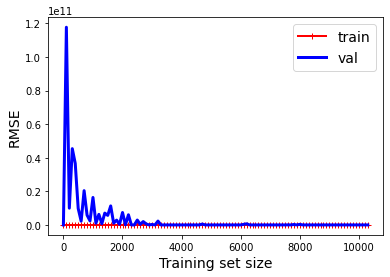

In [88]:
lnr= LinearRegression()
plot_learning_curves(lnr, X_train, y_train)
pyplot.show()

Now we will use train the Linear regression model on all of the training data

In [89]:
import math
from sklearn.metrics import mean_squared_error
lnr= LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

Then use the model to predict the sales for the test data

In [90]:
y_pred = lnr.predict(X_test)

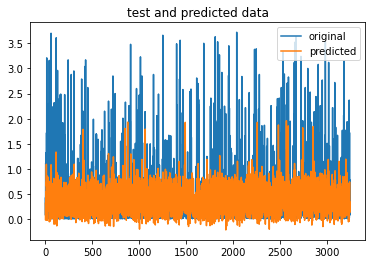

In [91]:
x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, y_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

Then we compute Mean absolute error, Meas squared error, and Root mean squared error

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.4f}')
print(f'Mean squared error: {mse:.4f}')
print(f'Root mean squared error: {rmse:.4f}')

Mean absolute error: 0.3209
Mean squared error: 0.2724
Root mean squared error: 0.5219


### Polynomial Regression

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(X_train)


poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
LinearRegression()


y_train_pred = poly_model.predict(x_train_poly)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print(f'Training Root mean squared error: {rmse_train:.2f}')


Training Root mean squared error: 0.46


In [94]:
y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Testing Root mean squared error: {rmse_test:.2f}')



Testing Root mean squared error: 29443199.12


### SVM

In [58]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train, y_train)

/home/mjaber/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [59]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse_train = np.sqrt(mse)

print(f'Testing Root mean squared error: {rmse_train:.2f}')

Testing Root mean squared error: 0.52


In [60]:
y_pred = lin_svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse_test = np.sqrt(mse)

print(f'Testing Root mean squared error: {rmse_test:.2f}')

Testing Root mean squared error: 0.54


In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   6.6s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   6.7s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   6.7s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   5.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   5.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   5.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   4.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   4.6s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   4.6s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   4.8s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   4.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16a6227730>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16a947bf40>},
                   random_state=42, verbose=2)

In [62]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

rmse_tr = np.sqrt(mse)


print(f'Training MSE: {mse:.2f}')

print(f'Training RMSE: {rmse_tr:.2f}')



Training MSE: 0.21
Training RMSE: 0.46


In [78]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse_testing = np.sqrt(mse)

print(f'Testing MSE: {mse:.2f}')

print(f'Testing RMSE: {rmse_testing:.2f}')


Testing MSE: 0.27
Testing RMSE: 0.52


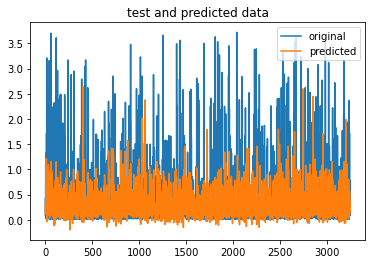

In [64]:
x_ax = range(len(y_test))
pyplot.plot(x_ax, y_test, label="original")
pyplot.plot(x_ax, y_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

### Now we will do experiments with Oridnal Encoded data

In [79]:
y_ordinal = ordinal_encoded_data['Global_Sales']
X_ordinal = ordinal_encoded_data.drop(['Global_Sales'], axis=1)

In [80]:
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ordinal, y_ordinal, train_size=0.8, random_state=42)

### Linear Regression

Root Mean Squared Error of the model : 0.564


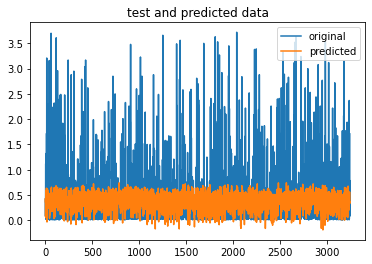

In [81]:
import math
from sklearn.metrics import mean_squared_error
lnr= LinearRegression()
lnr.fit(X_train_ord, y_train_ord)
y_pred = lnr.predict(X_test_ord)
rmse_lnr = math.sqrt(mean_squared_error(y_test_ord, y_pred))
print(f"Root Mean Squared Error of the model : {rmse_lnr:.3f}")
x_ax = range(len(y_test_ord))
pyplot.plot(x_ax, y_test_ord, label="original")
pyplot.plot(x_ax, y_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

### Polynomial Regression

In [82]:
 from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
x_train_ord_poly = poly_features.fit_transform(X_train_ord)

poly_model = LinearRegression()
poly_model.fit(x_train_ord_poly, y_train_ord)
LinearRegression()
y_train_pred = poly_model.predict(x_train_ord_poly)
rmse_train = np.sqrt(mean_squared_error(y_train_ord,y_train_pred))
print(rmse_train)
 


0.5348715436000537


In [83]:
y_test_pred = poly_model.predict(poly_features.fit_transform(X_test_ord))
rmse_test = np.sqrt(mean_squared_error(y_test_ord, y_test_pred))
print(rmse_test)

0.553909732366244


Testing Root mean squared error: 0.77


/home/mjaber/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


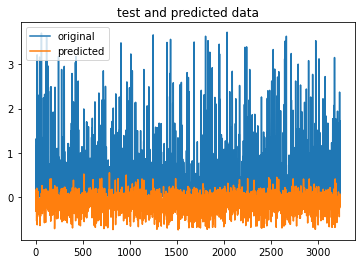

In [70]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_ord, y_train_ord)

from sklearn.metrics import mean_squared_error
y_test_pred = lin_svr.predict(X_test_ord)

mse = mean_squared_error(y_test_ord, y_test_pred)

rmse_test = np.sqrt(mse)

print(f'Testing Root mean squared error: {rmse_test:.2f}')

x_ax = range(len(y_test_ord))
pyplot.plot(x_ax, y_test_ord, label="original")
pyplot.plot(x_ax, y_test_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

##### We will do experiemnts with Ordinal Encoding + Normalization 


In [71]:
from sklearn import preprocessing

norm_data = preprocessing.normalize(ordinal_encoded_data)

X_lb = norm_data[:,0:4]
y_lb = norm_data[:,4]


In [72]:
X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(X_lb, y_lb, train_size=0.8, random_state=42)

### Linear Regression

Root Mean Squared Error of the model : 0.021


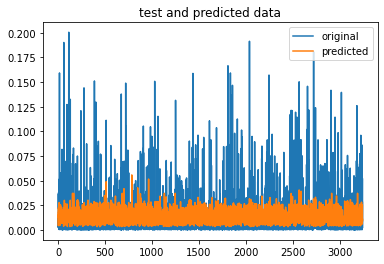

In [73]:
import math
from sklearn.metrics import mean_squared_error
lnr= LinearRegression()
lnr.fit(X_train_lb, y_train_lb)
y_pred = lnr.predict(X_test_lb)
rmse_lnr = math.sqrt(mean_squared_error(y_test_lb, y_pred))
print(f"Root Mean Squared Error of the model : {rmse_lnr:.3f}")
x_ax = range(len(y_test_lb))
pyplot.plot(x_ax, y_test_lb, label="original")
pyplot.plot(x_ax, y_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

### Polynomial Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)
x_train_poly = poly_features.fit_transform(X_train_lb)


poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train_lb)
LinearRegression()


y_train_pred = poly_model.predict(x_train_poly)
rmse_train = np.sqrt(mean_squared_error(y_train_lb,y_train_pred))
print(rmse_train)
 


0.0061392464901977506


In [75]:

y_test_pred = poly_model.predict(poly_features.fit_transform(X_test_lb))
rmse_test = np.sqrt(mean_squared_error(y_test_lb, y_test_pred))
print(rmse_test)

0.006489315825400639


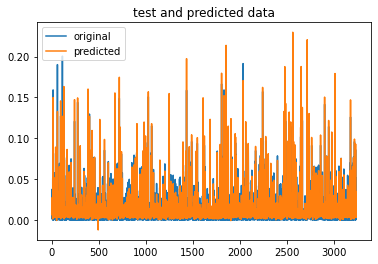

In [76]:
x_ax = range(len(y_test_lb))
pyplot.plot(x_ax, y_test_lb, label="original")
pyplot.plot(x_ax, y_test_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()

Testing Root mean squared error: 0.02


/home/mjaber/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


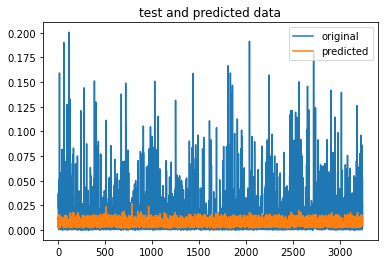

In [77]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_lb, y_train_lb)

from sklearn.metrics import mean_squared_error
y_test_pred = lin_svr.predict(X_test_lb)

mse = mean_squared_error(y_test_lb, y_test_pred)

rmse_test = np.sqrt(mse)

print(f'Testing Root mean squared error: {rmse_test:.2f}')

x_ax = range(len(y_test_lb))
pyplot.plot(x_ax, y_test_lb, label="original")
pyplot.plot(x_ax, y_test_pred, label="predicted")
pyplot.title("test and predicted data")
pyplot.legend()
pyplot.show()